## Small Dwave

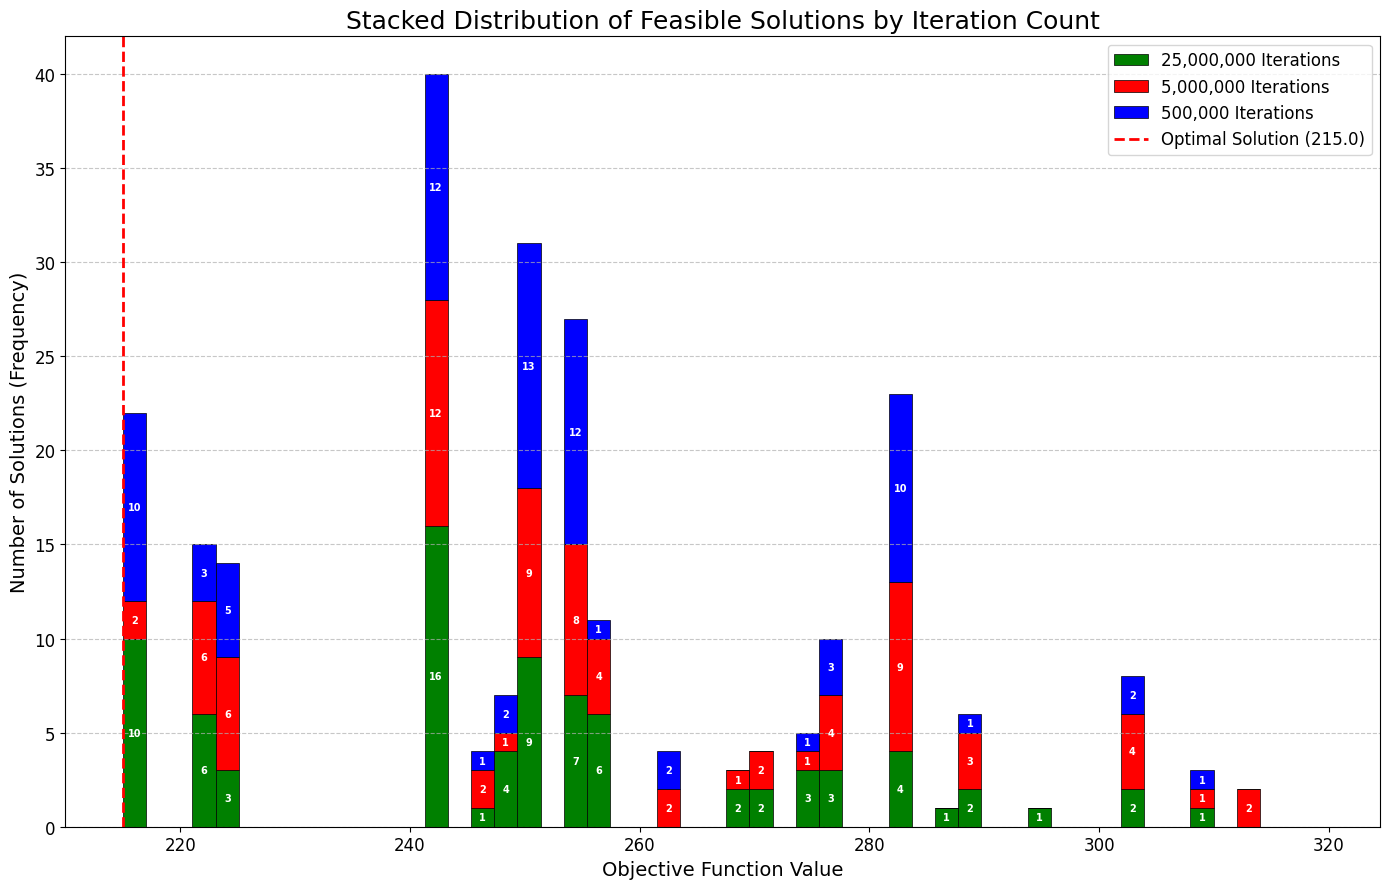

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Load Your Dataset ---
# This part remains the same.
try:
    df = pd.read_csv('small_dwave_results.csv')
except FileNotFoundError:
    print("File not found. Please replace 'your_dataset.csv' with the correct filename.")
    # As a fallback for demonstration, we create a sample dataframe.
    print("Creating a sample dataframe for demonstration purposes...")
    data = []
    np.random.seed(42) # for reproducibility
    # 500k iterations data
    data.extend([{'obj_value': 215.0 if np.random.rand() > 0.8 else np.random.uniform(220, 400), 'feasibility': True, 'num_iterations': 500000} for _ in range(100)])
    # 5M iterations data
    data.extend([{'obj_value': 215.0 if np.random.rand() > 0.6 else np.random.uniform(215, 300), 'feasibility': True, 'num_iterations': 5000000} for _ in range(100)])
    # 25M iterations data
    data.extend([{'obj_value': 215.0 if np.random.rand() > 0.4 else np.random.uniform(215, 250), 'feasibility': True, 'num_iterations': 25000000} for _ in range(100)])
    df = pd.DataFrame(data)


# --- 2. Prepare the Data ---
# This part is unchanged.
feasible_df = df[df['feasibility'] == True].copy()
obj_vals_500k = feasible_df[feasible_df['num_iterations'] == 500000]['obj_value']
obj_vals_5M = feasible_df[feasible_df['num_iterations'] == 5000000]['obj_value']
obj_vals_25M = feasible_df[feasible_df['num_iterations'] == 25000000]['obj_value']
optimal_solution = 215.0

# --- 3. Create the Plot ---
fig, ax = plt.subplots(figsize=(14, 9))

all_data = pd.concat([obj_vals_500k, obj_vals_5M, obj_vals_25M])
min_val = all_data.min()
max_val = all_data.max()
bins = np.linspace(min_val, max_val, 50)

# Prepare data for stacking
data_to_stack = [obj_vals_25M, obj_vals_5M, obj_vals_500k]
colors = ['green', 'red', 'blue']
labels = ['25,000,000 Iterations', '5,000,000 Iterations', '500,000 Iterations']

# --- 4. Draw Histogram and Capture Patches ---
n, bins, all_patches = ax.hist(data_to_stack, bins=bins, label=labels, color=colors, stacked=True, edgecolor='black', linewidth=0.5)


# --- 5. Add Text Labels to Bars ---
for patch_list in all_patches:
    for patch in patch_list:
        count = patch.get_height()
        if count > 0:
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_y() + patch.get_height() / 2
            ax.text(x, y, int(count), ha='center', va='center', color='white', fontsize=7, weight='bold')


# --- 6. Style the Plot ---
ax.axvline(optimal_solution, color='red', linestyle='--', linewidth=2, label=f'Optimal Solution ({optimal_solution})')

# The following line is commented out to switch to a linear scale
# ax.set_yscale('log') 

ax.set_title('Stacked Distribution of Feasible Solutions by Iteration Count', fontsize=18)
ax.set_xlabel('Objective Function Value', fontsize=14)
ax.set_ylabel('Number of Solutions (Frequency)', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(loc='upper right', fontsize=12)
ax.set_xlim(left=210, right=np.percentile(all_data, 99) * 1.05)
# The ylim setting was removed as it's not needed for a linear scale starting at 0

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.show()

## Time data

In [18]:
import pandas as pd
import numpy as np

# --- 1. Load Your Dataset --
df = pd.read_csv('small_dwave_results.csv')


# --- 2. Filter for Feasible Solutions ---
feasible_df = df[df['feasibility'] == True].copy()
print(f"Found a total of {len(feasible_df)} feasible solutions to analyze.")
print("-" * 65)


# --- 3. Calculate All Statistics Simultaneously ---

# Group by iteration count and use .agg() to calculate all statistics at once.
# This is the most efficient way to get multiple statistics from multiple columns.
summary_stats = feasible_df.groupby('num_iterations').agg(
    # New Column Name = (Column to Aggregate, Aggregation Function)
    number_of_solutions=('obj_value', 'count'),
    average_time=('elapsed_time', 'mean'),
    average_objective_value=('obj_value', 'mean')
)

print("Comprehensive Statistics for FEASIBLE solutions by iteration count:")
print("-" * 65)

# --- 4. Loop Through the Results and Print the Comprehensive Summary ---
for num_iter, stats in summary_stats.iterrows():
    count = int(stats['number_of_solutions'])
    avg_time = stats['average_time']
    avg_obj_val = stats['average_objective_value']
    
    print(f"For {num_iter:,} iterations:")
    print(f"  - Number of feasible solutions: {count}")
    print(f"  - Average objective value:      {avg_obj_val:.4f}")
    print(f"  - Average time per run:         {avg_time:.4f} seconds\n")

Found a total of 241 feasible solutions to analyze.
-----------------------------------------------------------------
Comprehensive Statistics for FEASIBLE solutions by iteration count:
-----------------------------------------------------------------
For 500,000 iterations:
  - Number of feasible solutions: 79
  - Average objective value:      250.8013
  - Average time per run:         0.6296 seconds

For 5,000,000 iterations:
  - Number of feasible solutions: 79
  - Average objective value:      257.5620
  - Average time per run:         6.5745 seconds

For 25,000,000 iterations:
  - Number of feasible solutions: 83
  - Average objective value:      250.4036
  - Average time per run:         33.8454 seconds



## Small_Fujitsu 

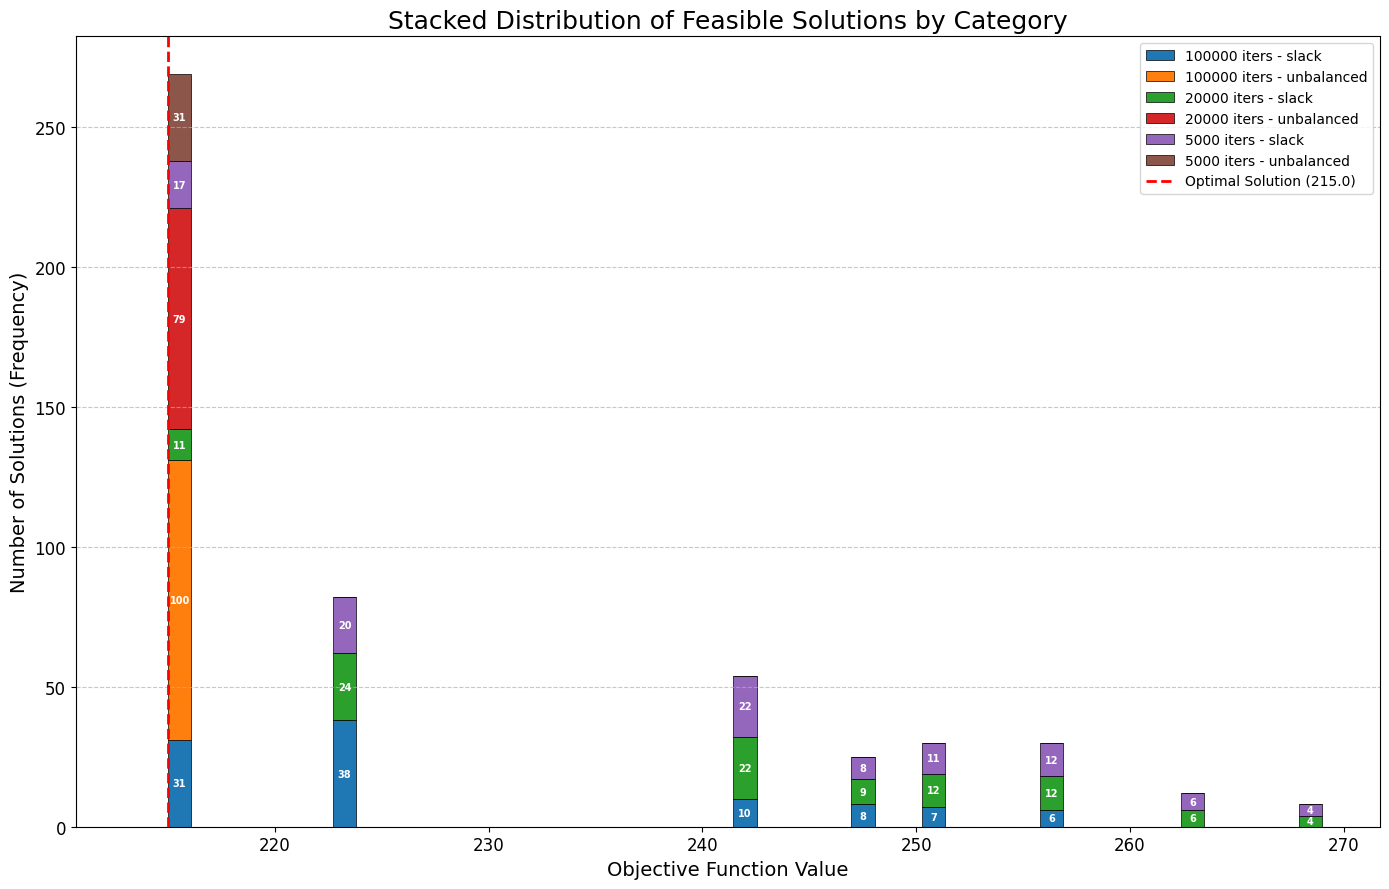

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Load Your New Dataset ---
# IMPORTANT: Replace 'new_dataset.csv' with the actual name of your new file.
try:
    df = pd.read_csv('fujitsu_small_results.csv')
except FileNotFoundError:
    print("File not found. Please replace 'new_dataset.csv' with the correct filename.")
    # As a fallback for demonstration, we create a sample dataframe with the new structure.
    print("Creating a sample dataframe for demonstration purposes...")
    data = []
    np.random.seed(42) # for reproducibility
    iterations = [5000, 10000, 20000]
    penalties = ['slack', 'unbalanced']
    for i in iterations:
        for p in penalties:
            # Create ~50 runs for each of the 6 categories
            data.extend([{'obj_value': np.random.uniform(220, 300 - i/200), 'feasibility': True, 'elapsed_time': 1, 'num_iterations': i, 'penalty_method': p} for _ in range(50)])
    df = pd.DataFrame(data)


# --- 2. Prepare the Data ---

# Create a new 'category' column by combining iterations and penalty method
df['category'] = df['num_iterations'].astype(str) + ' iters - ' + df['penalty_method']

# Filter for feasible solutions only
feasible_df = df[df['feasibility'] == True].copy()

# IMPORTANT: Update the optimal solution value for your new problem.
optimal_solution = 215.0

# --- 3. Create Data and Labels for Stacking ---

# Get a sorted list of the unique categories to ensure consistent order
categories = sorted(feasible_df['category'].unique())

# Prepare the data, colors, and labels for the histogram
data_to_stack = [feasible_df[feasible_df['category'] == cat]['obj_value'] for cat in categories]
# A colorblind-friendly palette with 6 distinct colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
labels = categories


# --- 4. Create the Plot ---
fig, ax = plt.subplots(figsize=(14, 9))

# Determine bins based on all feasible data
all_data = feasible_df['obj_value']
min_val = all_data.min()
max_val = all_data.max()
bins = np.linspace(min_val, max_val, 50)

# --- 5. Draw Histogram and Capture Patches ---
n, bins, all_patches = ax.hist(data_to_stack, bins=bins, label=labels, color=colors, stacked=True, edgecolor='black', linewidth=0.5)


# --- 6. Add Text Labels to Bars ---
# This logic works perfectly for 6 categories as well.
for patch_list in all_patches:
    for patch in patch_list:
        count = patch.get_height()
        if count > 0:
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_y() + patch.get_height() / 2
            ax.text(x, y, int(count), ha='center', va='center', color='white', fontsize=7, weight='bold')


# --- 7. Style the Plot ---
ax.axvline(optimal_solution, color='red', linestyle='--', linewidth=2, label=f'Optimal Solution ({optimal_solution})')

# Using a linear scale as in the last version. Uncomment to use log scale.
# ax.set_yscale('log')

ax.set_title('Stacked Distribution of Feasible Solutions by Category', fontsize=18)
ax.set_xlabel('Objective Function Value', fontsize=14)
ax.set_ylabel('Number of Solutions (Frequency)', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(loc='upper right', fontsize=10) # Adjusted font size for more labels

# Adjust x-axis limits if needed
ax.set_xlim(left=all_data.min() * 0.98)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.show()

## fujistu small zoomed

Successfully loaded 'fujitsu_small_results.csv'
Found 269 feasible solutions in the range [214.9, 215.5] to plot.


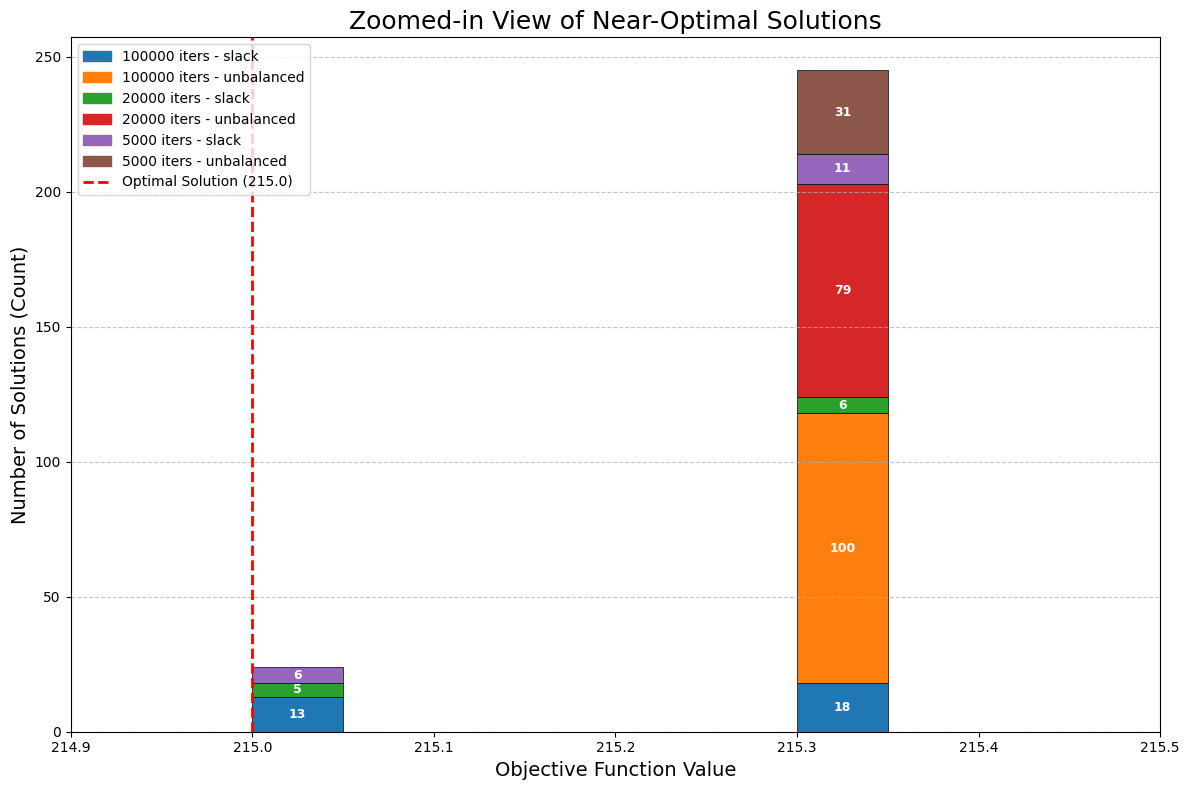

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches # Needed for the legend

# --- 1. Load Your Specific Dataset ---
# Using the filename 'fujitsu_small_results.csv'.
try:
    df = pd.read_csv('fujitsu_small_results.csv')
    print("Successfully loaded 'fujitsu_small_results.csv'")
except FileNotFoundError:
    print("File not found: 'fujitsu_small_results.csv'. Please ensure it's in the same folder.")
    # As a fallback for demonstration, we create a sample dataframe.
    print("Creating a sample dataframe for demonstration purposes...")
    data = []
    np.random.seed(42) # for reproducibility
    iterations = [5000, 10000, 20000]
    penalties = ['slack', 'unbalanced']
    for i in iterations:
        for p in penalties:
            base_data = np.random.uniform(220, 300, 50)
            base_data[5:10] = 215.0
            base_data[10:20] = 215.08
            data.extend([{'obj_value': val, 'feasibility': True, 'elapsed_time': 1, 'num_iterations': i, 'penalty_method': p} for val in base_data])
    df = pd.DataFrame(data)


# --- 2. Prepare the Data ---
# Create a 'category' column to combine iterations and penalty method
df['category'] = df['num_iterations'].astype(str) + ' iters - ' + df['penalty_method']
# Filter for feasible solutions only
feasible_df = df[df['feasibility'] == True].copy()

# Define your optimal solution value
optimal_solution = 215.0


# --- 3. Filter Data for the Zoomed View ---
# We focus on the near-optimal range
zoom_range = [214.9, 215.5]
zoom_df = feasible_df[
    (feasible_df['obj_value'] >= zoom_range[0]) &
    (feasible_df['obj_value'] <= zoom_range[1])
].copy()

if zoom_df.empty:
    print("No feasible solutions found in the specified zoom range (214 to 216).")
else:
    print(f"Found {len(zoom_df)} feasible solutions in the range {zoom_range} to plot.")
    # --- 4. Create a Bar Chart for Exact Values ---
    # Count occurrences of each exact obj_value, broken down by category
    counts = zoom_df.groupby(['category', 'obj_value']).size().reset_index(name='count')
    
    # Get the unique objective values to plot on the x-axis
    unique_obj_values = sorted(counts['obj_value'].unique())
    
    # Define categories and colors for the plot
    categories = sorted(feasible_df['category'].unique())
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.05 # A narrow width suitable for the small range

    # --- 5. Manually Build the Stacked Bars ---
    for value in unique_obj_values:
        bottom = 0
        for i, category in enumerate(categories):
            # Find the count for the current value and category
            count_row = counts[(counts['obj_value'] == value) & (counts['category'] == category)]
            
            if not count_row.empty:
                count = count_row['count'].iloc[0]
                
                # MODIFIED: Added align='edge' to make the bar start at its value
                ax.bar(value, height=count, width=bar_width, bottom=bottom, color=colors[i], edgecolor='black', linewidth=0.5, align='edge')
                
                # MODIFIED: Adjusted text x-position to be in the center of the new bar
                ax.text(value + bar_width / 2, bottom + count / 2, int(count), ha='center', va='center', color='white', fontsize=9, weight='bold')
                
                bottom += count
    
    # --- 6. Style the Zoomed Plot ---
    ax.set_title('Zoomed-in View of Near-Optimal Solutions', fontsize=18)
    ax.set_xlabel('Objective Function Value', fontsize=14)
    ax.set_ylabel('Number of Solutions (Count)', fontsize=14)
    
    # Set the x-axis limits exactly as requested
    ax.set_xlim(zoom_range)
    
    # Make sure y-axis starts at 0 and has integer ticks if possible
    ax.set_ylim(bottom=0)
    max_y = zoom_df.groupby('obj_value').size().max()
    if max_y < 10: # Use integer ticks for small counts
        ax.set_yticks(range(int(max_y) + 2))
        
    # Draw the optimal solution line
    optimal_line = ax.axvline(optimal_solution, color='red', linestyle='--', linewidth=2, label=f'Optimal Solution ({optimal_solution})')
        
    # Manually create the legend, now including the optimal line
    legend_patches = [mpatches.Patch(color=colors[i], label=categories[i]) for i in range(len(categories))]
    # Combine the color patches with the handle for the line plot
    handles = legend_patches + [optimal_line]
    ax.legend(handles=handles, loc='upper left', fontsize=10)
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## small fujitsu data

In [30]:
import pandas as pd
import numpy as np

# --- 1. Load Your Dataset ---
# Using the specified filename "fujitsu_small_results.csv".
try:
    df = pd.read_csv('fujitsu_small_results.csv')
    print("Successfully loaded 'fujitsu_small_results.csv'")
except FileNotFoundError:
    print("File not found: 'fujitsu_small_results.csv'. Please ensure it's in the same folder.")
    # As a fallback for demonstration, we create a sample dataframe.
    print("Creating a sample dataframe for demonstration purposes...")
    data = []
    np.random.seed(42) # for reproducibility
    iterations = [5000, 10000, 20000]
    penalties = ['slack', 'unbalanced']
    for i in iterations:
        for p in penalties:
            base_data = np.random.uniform(216, 250, 50)
            base_data[5:15] = 215.0 # 10 instances of 215.0
            base_data[15:22] = 215.3 # 7 instances of 215.3
            data.extend([{'obj_value': val, 'feasibility': True, 'elapsed_time': np.random.uniform(i/1000, i/500), 'num_iterations': i, 'penalty_method': p} for val in base_data])
    df = pd.DataFrame(data)


# --- 2. Prepare the Data ---
# Create a 'category' column to combine iterations and penalty method
df['category'] = df['num_iterations'].astype(str) + ' iters - ' + df['penalty_method']
# Filter for feasible solutions only
feasible_df = df[df['feasibility'] == True].copy()

# Define the optimal solution value
optimal_solution_value = 215.0

print(f"\nFound a total of {len(feasible_df)} feasible solutions to analyze.")
print("-" * 70)


# --- 3. Calculate All Statistics Simultaneously ---

# Define a custom function to count the number of optimal solutions
def count_optimal(series):
    return (series == optimal_solution_value).sum()

# Group by the combined category and use .agg() to calculate all statistics at once
summary_stats = feasible_df.groupby('category').agg(
    # New Column Name = (Column to Aggregate, Aggregation Function)
    number_of_solutions=('obj_value', 'count'),
    average_time=('elapsed_time', 'mean'),
    average_objective_value=('obj_value', 'mean'),
    optimal_solution_count=('obj_value', count_optimal) # Use our custom function
)

# --- 4. Print the Comprehensive Summary ---
print("Comprehensive Statistics for FEASIBLE solutions by category:")
print("-" * 70)

for category, stats in summary_stats.iterrows():
    count = int(stats['number_of_solutions'])
    avg_time = stats['average_time']
    avg_obj_val = stats['average_objective_value']
    optimal_count = int(stats['optimal_solution_count'])
    
    print(f"For category '{category}':")
    print(f"  - Number of feasible solutions: {count}")
    print(f"  - Number of optimal solutions found: {optimal_count}")
    print(f"  - Average objective value:      {avg_obj_val:.4f}")
    print(f"  - Average time per run:         {avg_time:.4f} seconds\n")

Successfully loaded 'fujitsu_small_results.csv'

Found a total of 510 feasible solutions to analyze.
----------------------------------------------------------------------
Comprehensive Statistics for FEASIBLE solutions by category:
----------------------------------------------------------------------
For category '100000 iters - slack':
  - Number of feasible solutions: 100
  - Number of optimal solutions found: 13
  - Average objective value:      228.4280
  - Average time per run:         61.5786 seconds

For category '100000 iters - unbalanced':
  - Number of feasible solutions: 100
  - Number of optimal solutions found: 0
  - Average objective value:      215.3000
  - Average time per run:         47.7412 seconds

For category '20000 iters - slack':
  - Number of feasible solutions: 100
  - Number of optimal solutions found: 5
  - Average objective value:      240.1610
  - Average time per run:         12.0186 seconds

For category '20000 iters - unbalanced':
  - Number of feasib

## MILP benders, constrained plots

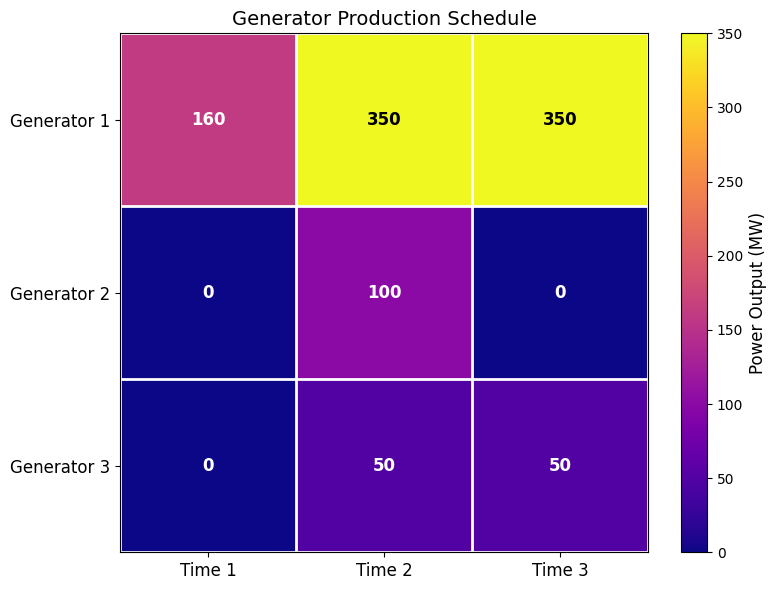

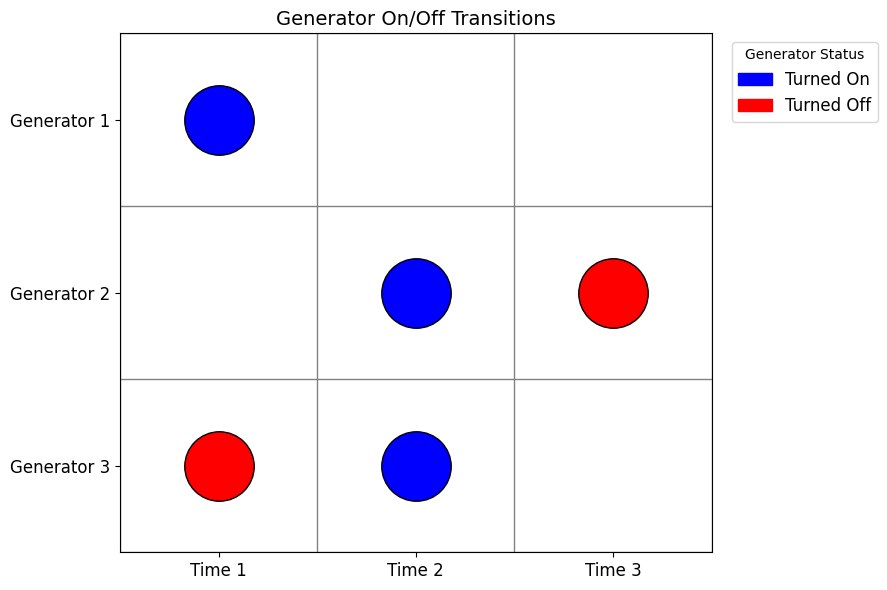

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import ast
from io import StringIO

# --- Data Preparation ---
# On/Off data from the original CSV
csv_data = """number_of_time_periods,commitment_schedule,turning_on_schedule,turning_off_schedule
3,"{(1, 1): 1.0, (1, 2): 1.0, (1, 3): 1.0, (2, 1): 0.0, (2, 2): 1.0, (2, 3): 0.0, (3, 1): 0.0, (3, 2): 1.0, (3, 3): 1.0}","{(1, 1): 1.0, (1, 2): 0.0, (1, 3): 0.0, (2, 1): 0.0, (2, 2): 1.0, (2, 3): 0.0, (3, 1): 0.0, (3, 2): 1.0, (3, 3): 0.0}","{(1, 1): 0.0, (1, 2): 0.0, (1, 3): 0.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 1.0, (3, 1): 1.0, (3, 2): 0.0, (3, 3): 0.0}"
"""
# This part is just to get the on/off data easily
df = pd.read_csv(StringIO(csv_data))
turning_on_schedule = ast.literal_eval(df['turning_on_schedule'][0])
turning_off_schedule = ast.literal_eval(df['turning_off_schedule'][0])

# New production data provided by you
production_data = {
    1: {1: 160.00, 2: 0.00, 3: 0.00},
    2: {1: 350.00, 2: 100.00, 3: 50.00},
    3: {1: 350.00, 2: 0.00, 3: 50.00}
}

# Define dimensions
num_generators = 3
num_time_periods = 3

# Create the data matrices
production_matrix = np.zeros((num_generators, num_time_periods))
on_off_matrix = np.zeros((num_generators, num_time_periods))

for t, gen_data in production_data.items():
    for g, prod in gen_data.items():
        production_matrix[g - 1, t - 1] = prod

for (g, t), val in turning_on_schedule.items():
    if val == 1.0: on_off_matrix[g - 1, t - 1] = 1
for (g, t), val in turning_off_schedule.items():
    if val == 1.0: on_off_matrix[g - 1, t - 1] = -1


# Define axis labels
gen_labels = [f'Generator {i+1}' for i in range(num_generators)]
time_labels = [f'Time {i+1}' for i in range(num_time_periods)]


# --- Plot 1: Generator Production Schedule ---
fig1, ax1 = plt.subplots(figsize=(8, 6))

# Use imshow to draw the heatmap
im = ax1.imshow(production_matrix, cmap='plasma', aspect='auto')

# Set ticks and labels
ax1.set_xticks(np.arange(num_time_periods))
ax1.set_yticks(np.arange(num_generators))
ax1.set_xticklabels(time_labels, fontsize=12)
ax1.set_yticklabels(gen_labels, fontsize=12)

# Add a grid
ax1.set_xticks(np.arange(-.5, num_time_periods, 1), minor=True)
ax1.set_yticks(np.arange(-.5, num_generators, 1), minor=True)
ax1.grid(which='minor', color='white', linestyle='-', linewidth=2)
ax1.tick_params(which='minor', size=0)

# Add the production values as text in the center of each cell
for g in range(num_generators):
    for t in range(num_time_periods):
        power_val = production_matrix[g, t]
        # Use white text for dark backgrounds, and black for light backgrounds
        text_color = "white" if im.norm(power_val) < 0.5 else "black"
        ax1.text(t, g, f"{power_val:.0f}", ha="center", va="center", color=text_color, fontsize=12, weight='bold')


# Add a color bar
cbar = fig1.colorbar(im)
cbar.set_label("Power Output (MW)", fontsize=12)

ax1.set_title("Generator Production Schedule", fontsize=14)
plt.tight_layout()
plt.savefig("generator_production_schedule.png")
plt.show()


# --- Plot 2: Generator On/Off Transitions (Larger Circles) ---
fig2, ax2 = plt.subplots(figsize=(9, 6))

# Set axis limits and labels
ax2.set_xlim(-0.5, num_time_periods - 0.5)
ax2.set_ylim(-0.5, num_generators - 0.5)
ax2.set_xticks(np.arange(num_time_periods))
ax2.set_yticks(np.arange(num_generators))
ax2.set_xticklabels(time_labels, fontsize=12)
ax2.set_yticklabels(gen_labels, fontsize=12)
ax2.invert_yaxis() # Have Generator 1 at the top

# Draw the grid
ax2.set_xticks(np.arange(-.5, num_time_periods, 1), minor=True)
ax2.set_yticks(np.arange(-.5, num_generators, 1), minor=True)
ax2.grid(which='minor', color='gray', linestyle='-', linewidth=1)
ax2.grid(which='major', linestyle='none')
ax2.tick_params(which='minor', size=0)

# Iterate through the matrix and draw larger circles
for g in range(num_generators):
    for t in range(num_time_periods):
        status = on_off_matrix[g, t]
        if status == 1:  # Turned On
            ax2.plot(t, g, 'o', markersize=50, markerfacecolor='blue', markeredgecolor='black')
        elif status == -1:  # Turned Off
            ax2.plot(t, g, 'o', markersize=50, markerfacecolor='red', markeredgecolor='black')

# Add the legend
legend_patches = [
    Patch(color='blue', label='Turned On'),
    Patch(color='red', label='Turned Off'),
]
ax2.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1.02, 1), fontsize=12, title="Generator Status")

ax2.set_title("Generator On/Off Transitions", fontsize=14)
plt.tight_layout()
plt.savefig("generator_on_off_transitions_final.png")
plt.show()

## benders converge for the goal

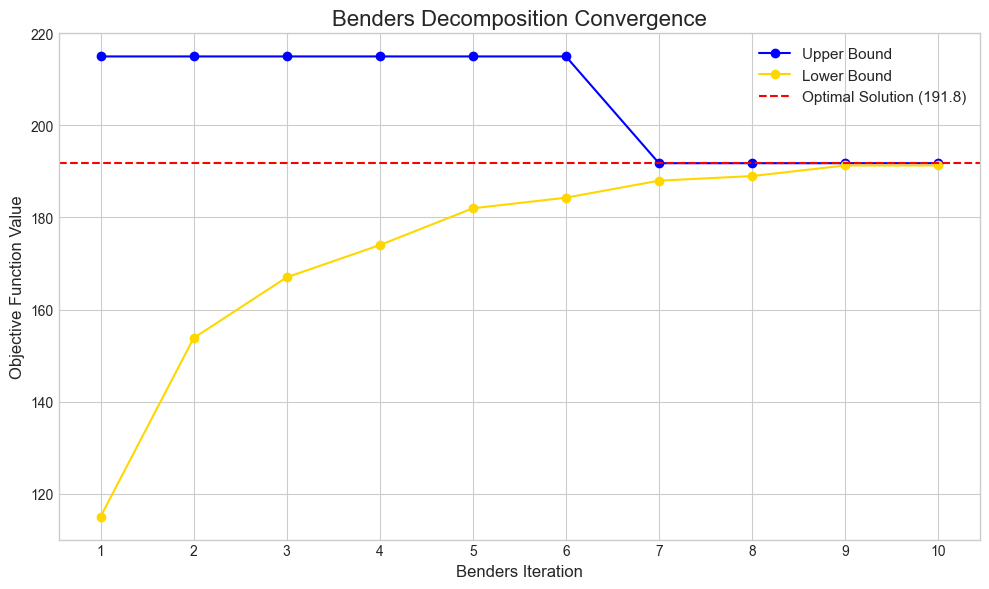

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
from io import StringIO

# --- Data Preparation ---
# Load the data from the string, as if it were a CSV file
csv_data = """number_of_time_periods,lower_bounds,upper_bounds,optimal_solution,time_used,number_of_benders_iterations,commitment_schedule,turning_on_schedule,turning_off_schedule
3,"[115.0, 153.8, 167.0, 174.0, 182.0, 184.3, 188.0, 189.0, 191.3, 191.3]","[215.0, 215.0, 215.0, 215.0, 215.0, 215.0, 191.8, 191.8, 191.8, 191.8]",191.8,2.186868190765381,10,"...","...","..."
"""

# Read the data into a pandas DataFrame
df = pd.read_csv(StringIO(csv_data))

# --- Extract and Parse Data for the Plot ---
# Get the first (and only) row of data
data_row = df.iloc[0]

# Extract the number of iterations to define the x-axis
num_iterations = data_row['number_of_benders_iterations']
iterations = np.arange(1, num_iterations + 1)

# The bounds are stored as strings, so we use ast.literal_eval to convert them to lists
lower_bounds = ast.literal_eval(data_row['lower_bounds'])
upper_bounds = ast.literal_eval(data_row['upper_bounds'])

# Get the final optimal value
optimal_solution = data_row['optimal_solution']


# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid') # Use a nice style for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the upper and lower bounds
# Using markers to clearly show the value at each discrete iteration
ax.plot(iterations, upper_bounds, marker='o', linestyle='-', color='blue', label='Upper Bound')
ax.plot(iterations, lower_bounds, marker='o', linestyle='-', color='gold', label='Lower Bound')

# Plot the optimal solution as a horizontal dotted red line
ax.axhline(y=optimal_solution, color='red', linestyle='--', label=f'Optimal Solution ({optimal_solution})')

# --- Formatting and Labels ---
ax.set_title('Benders Decomposition Convergence', fontsize=16)
ax.set_xlabel('Benders Iteration', fontsize=12)
ax.set_ylabel('Objective Function Value', fontsize=12)

# Ensure the x-axis has discrete integer ticks for each iteration
ax.set_xticks(iterations)

# Add a legend to identify the lines
ax.legend(fontsize=11)

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Save and show the plot
plt.savefig('benders_convergence_plot.png')
plt.show()

## Dwave 3-time periods

Combined plot saved as benders_convergence_comparison.png


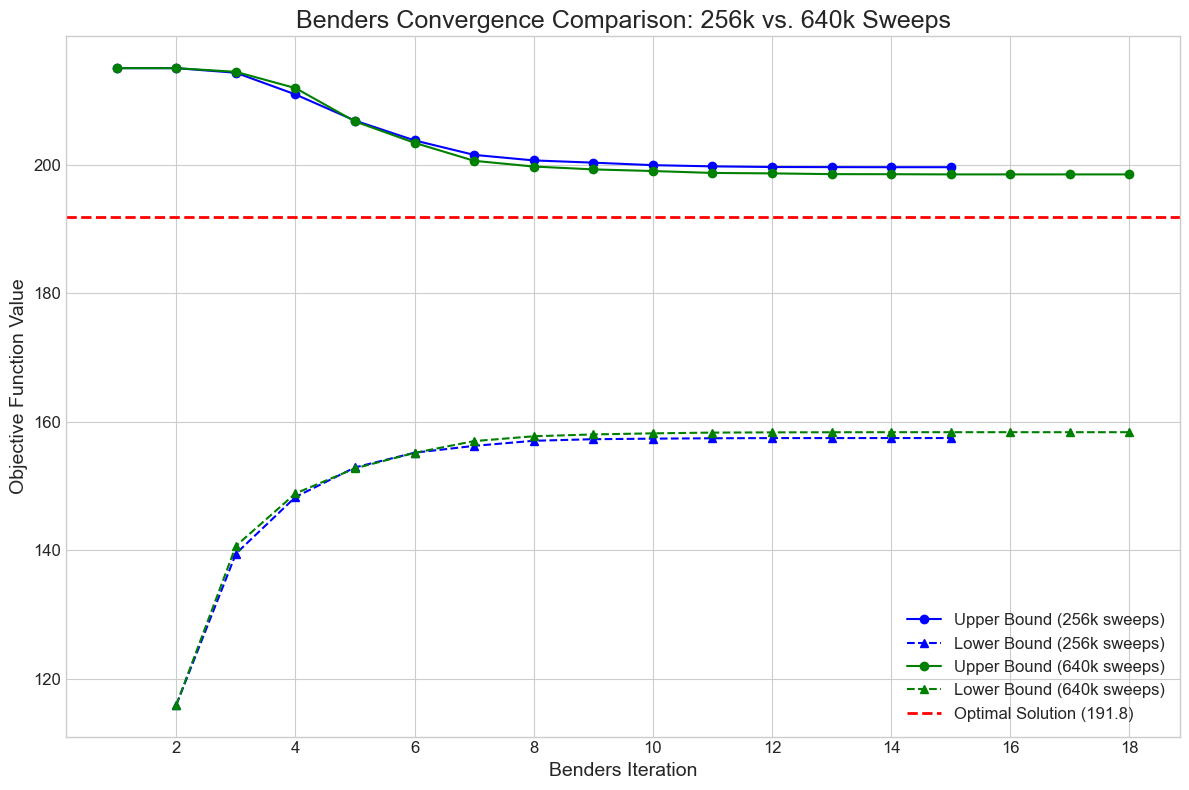

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
from matplotlib.ticker import MaxNLocator

def parse_bounds_list(bounds_string):
    """
    Custom function to parse a string representation of a list of numbers,
    correctly handling '-inf'.
    """
    if not isinstance(bounds_string, str): return []
    cleaned_string = bounds_string.strip('[] ')
    if not cleaned_string: return []
    str_values = cleaned_string.split(',')
    float_values = [float('-inf') if val.strip() == '-inf' else float(val) for val in str_values]
    return float_values

def process_group_data(df_group):
    """
    Takes a dataframe for a group and returns the processed average bounds and iteration counts.
    """
    if df_group.empty:
        return None, None, None

    df_copy = df_group.copy()
    df_copy.loc[:, 'lower_bounds'] = df_copy['lower_bounds'].apply(parse_bounds_list)
    df_copy.loc[:, 'upper_bounds'] = df_copy['upper_bounds'].apply(ast.literal_eval)

    if df_copy['number_of_benders_iterations'].empty:
        return None, None, None
        
    max_iterations = df_copy['number_of_benders_iterations'].max()
    iterations = np.arange(1, max_iterations + 1)

    padded_lower_bounds = [
        l + [l[-1]] * (max_iterations - len(l)) if l else [np.nan] * max_iterations
        for l in df_copy['lower_bounds']
    ]
    padded_upper_bounds = [
        u + [u[-1]] * (max_iterations - len(u)) if u else [np.nan] * max_iterations
        for u in df_copy['upper_bounds']
    ]

    avg_lower_bounds = np.nanmean(np.array(padded_lower_bounds), axis=0)
    avg_upper_bounds = np.nanmean(np.array(padded_upper_bounds), axis=0)
    
    return iterations, avg_lower_bounds, avg_upper_bounds

# --- Main part of the script ---
if __name__ == '__main__':
    try:
        df = pd.read_csv("dwave_quboResults.csv")
    except FileNotFoundError:
        print("Error: The file 'dwave_quboResults.csv' was not found.")
        exit()

    # --- Data Filtering ---
    df_3_periods = df[df['number_of_time_periods'] == 3].copy()
    df_256k = df_3_periods[df_3_periods['number_of_sweeps'] == 256000].copy()
    df_640k = df_3_periods[df_3_periods['number_of_sweeps'] == 640000].copy()

    # --- Process Data for Both Groups ---
    iter_256k, lb_256k, ub_256k = process_group_data(df_256k)
    iter_640k, lb_640k, ub_640k = process_group_data(df_640k)
    
    # --- Plotting Setup ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 8))

    # --- Plot Data ---
    if iter_256k is not None:
        ax.plot(iter_256k, ub_256k, marker='o', linestyle='-', color='blue', label='Upper Bound (256k sweeps)')
        ax.plot(iter_256k, lb_256k, marker='^', linestyle='--', color='blue', label='Lower Bound (256k sweeps)')

    if iter_640k is not None:
        ax.plot(iter_640k, ub_640k, marker='o', linestyle='-', color='green', label='Upper Bound (640k sweeps)')
        ax.plot(iter_640k, lb_640k, marker='^', linestyle='--', color='green', label='Lower Bound (640k sweeps)')
    
    optimal_solution = 191.8
    ax.axhline(y=optimal_solution, color='red', linestyle='--', lw=2, label=f'Optimal Solution ({optimal_solution})')

    # --- Formatting and Labels ---
    ax.set_title('Benders Convergence Comparison: 256k vs. 640k Sweeps', fontsize=18)
    ax.set_xlabel('Benders Iteration', fontsize=14)
    ax.set_ylabel('Objective Function Value', fontsize=14)
    
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
    
    # --- LEGEND PLACEMENT MODIFIED ---
    ax.legend(loc='lower right', fontsize=12)
    
    ax.grid(True)
    plt.tight_layout()

    # --- Save and Show the Plot ---
    filename = 'benders_convergence_comparison.png'
    plt.savefig(filename)
    print(f"Combined plot saved as {filename}")
    plt.show()

## Data from Dwave 3-time period

In [6]:
import pandas as pd

def analyze_solver_performance(df_group, sweeps_value_str):
    """
    Analyzes and prints performance statistics for a given group of solver runs.

    Args:
        df_group (pd.DataFrame): The DataFrame containing runs for a specific sweep configuration.
        sweeps_value_str (str): A string describing the sweep configuration (e.g., "256,000").
    """
    print("--------------------------------------------------")
    print(f"Analysis for {sweeps_value_str} Sweeps Configuration")
    print("--------------------------------------------------")

    # Define the specific termination reason we are looking for
    termination_condition = "Known optimal solution for 3-period case"

    # Filter the DataFrame to get only the runs that meet this termination condition
    optimal_runs_df = df_group[df_group['termination_reason'] == termination_condition].copy()

    # 1. Calculate how many times the optimal solution was found
    num_optimal_found = len(optimal_runs_df)
    
    print(f"Found the known optimal solution: {num_optimal_found} times.")

    # 2. & 3. Calculate average time and iterations for these specific runs
    # We only proceed if the optimal solution was found at least once
    if num_optimal_found > 0:
        # Calculate the average of the 'time_used' column
        avg_time_to_opt = optimal_runs_df['time_used'].mean()
        
        # Calculate the average of the 'number_of_benders_iterations' column
        avg_iterations_to_opt = optimal_runs_df['number_of_benders_iterations'].mean()

        print(f"Average time when finding optimal: {avg_time_to_opt:.4f} seconds.")
        print(f"Average Benders iterations when finding optimal: {avg_iterations_to_opt:.2f} iterations.")
    else:
        print("Did not find the known optimal solution in any of these runs.")
    
    print("\n") # Add a blank line for better readability

# --- Main part of the script ---
if __name__ == '__main__':
    try:
        # Load the dataset
        df = pd.read_csv("dwave_quboResults.csv")
    except FileNotFoundError:
        print("Error: The file 'dwave_quboResults.csv' was not found.")
        print("Please make sure the CSV file is in the same directory as the script.")
        exit()

    # Filter for runs with 3 time periods
    df_3_periods = df[df['number_of_time_periods'] == 3]

    # Separate the data into two groups based on the number of sweeps
    df_256k = df_3_periods[df_3_periods['number_of_sweeps'] == 256000]
    df_640k = df_3_periods[df_3_periods['number_of_sweeps'] == 640000]

    # Run the analysis for each group
    analyze_solver_performance(df_256k, "256,000")
    analyze_solver_performance(df_640k, "640,000")

--------------------------------------------------
Analysis for 256,000 Sweeps Configuration
--------------------------------------------------
Found the known optimal solution: 16 times.
Average time when finding optimal: 26.4321 seconds.
Average Benders iterations when finding optimal: 7.94 iterations.


--------------------------------------------------
Analysis for 640,000 Sweeps Configuration
--------------------------------------------------
Found the known optimal solution: 28 times.
Average time when finding optimal: 63.5175 seconds.
Average Benders iterations when finding optimal: 9.11 iterations.




## Dwave hybridBQMSampler

Plot saved as hybrid_bqm_convergence.png


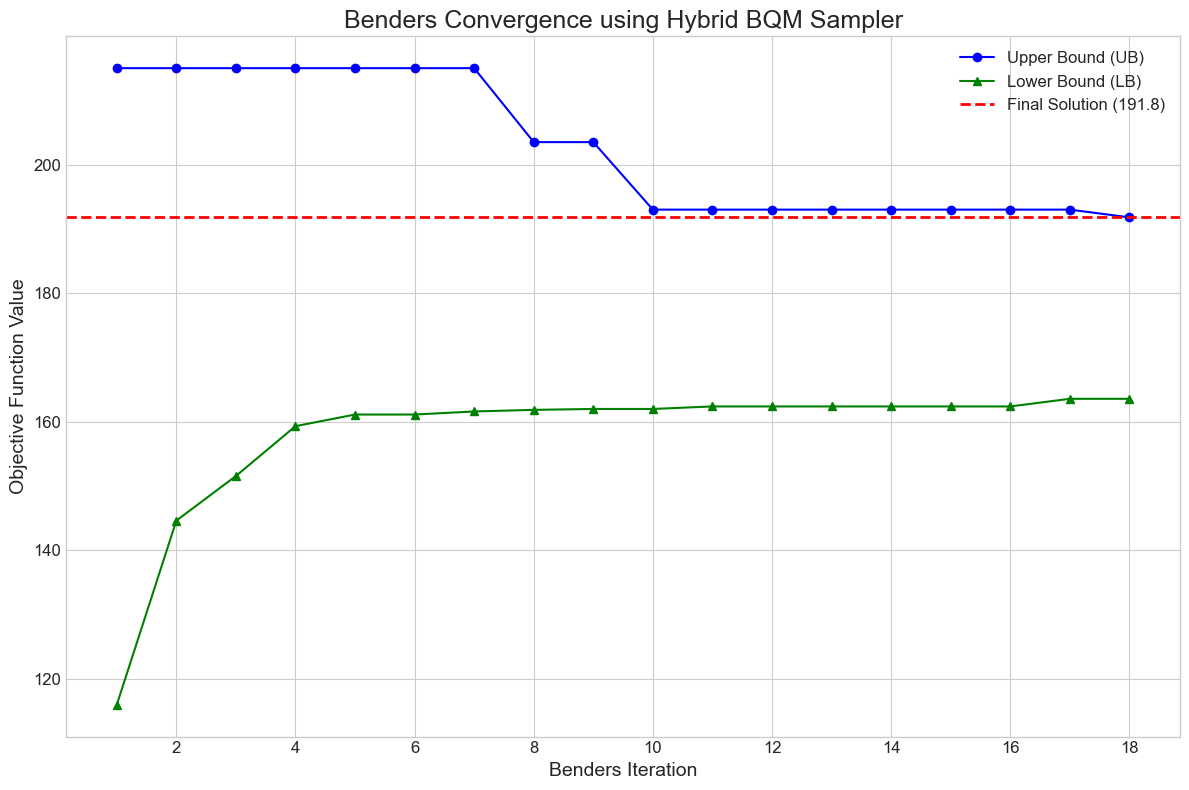

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# --- Data Extraction ---
# Manually extracted bounds from your log file for each iteration.
lower_bounds = [
    116.0000, 144.6400, 151.5750, 159.3250, 161.1333, 161.1333, 161.6107,
    161.8607, 162.0000, 162.0000, 162.3929, 162.3929, 162.3929, 162.3929,
    162.3929, 162.3929, 163.5786, 163.5786
]

upper_bounds = [
    215.0000, 215.0000, 215.0000, 215.0000, 215.0000, 215.0000, 215.0000,
    203.5000, 203.5000, 193.0000, 193.0000, 193.0000, 193.0000, 193.0000,
    193.0000, 193.0000, 193.0000, 191.8000
]

optimal_solution = 191.8
iterations = np.arange(1, len(lower_bounds) + 1)

# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the upper and lower bounds
ax.plot(iterations, upper_bounds, marker='o', linestyle='-', color='blue', label='Upper Bound (UB)')
ax.plot(iterations, lower_bounds, marker='^', linestyle='-', color='green', label='Lower Bound (LB)')

# Plot the final optimal solution as a horizontal dashed red line
ax.axhline(y=optimal_solution, color='red', linestyle='--', lw=2, label=f'Final Solution ({optimal_solution})')

# --- Formatting and Labels ---
ax.set_title('Benders Convergence using Hybrid BQM Sampler', fontsize=18)
ax.set_xlabel('Benders Iteration', fontsize=14)
ax.set_ylabel('Objective Function Value', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))

# --- LEGEND PLACEMENT REVERTED TO DEFAULT ---
# By removing the 'loc' argument, Matplotlib will place it in the 'best' location.
ax.legend(fontsize=12)

ax.grid(True)
plt.tight_layout()

# --- Save and Show the Plot ---
filename = 'hybrid_bqm_convergence.png'
plt.savefig(filename)
print(f"Plot saved as {filename}")
plt.show()

## Fujitsu 3-time

Plot saved as runs_convergence_comparison.png


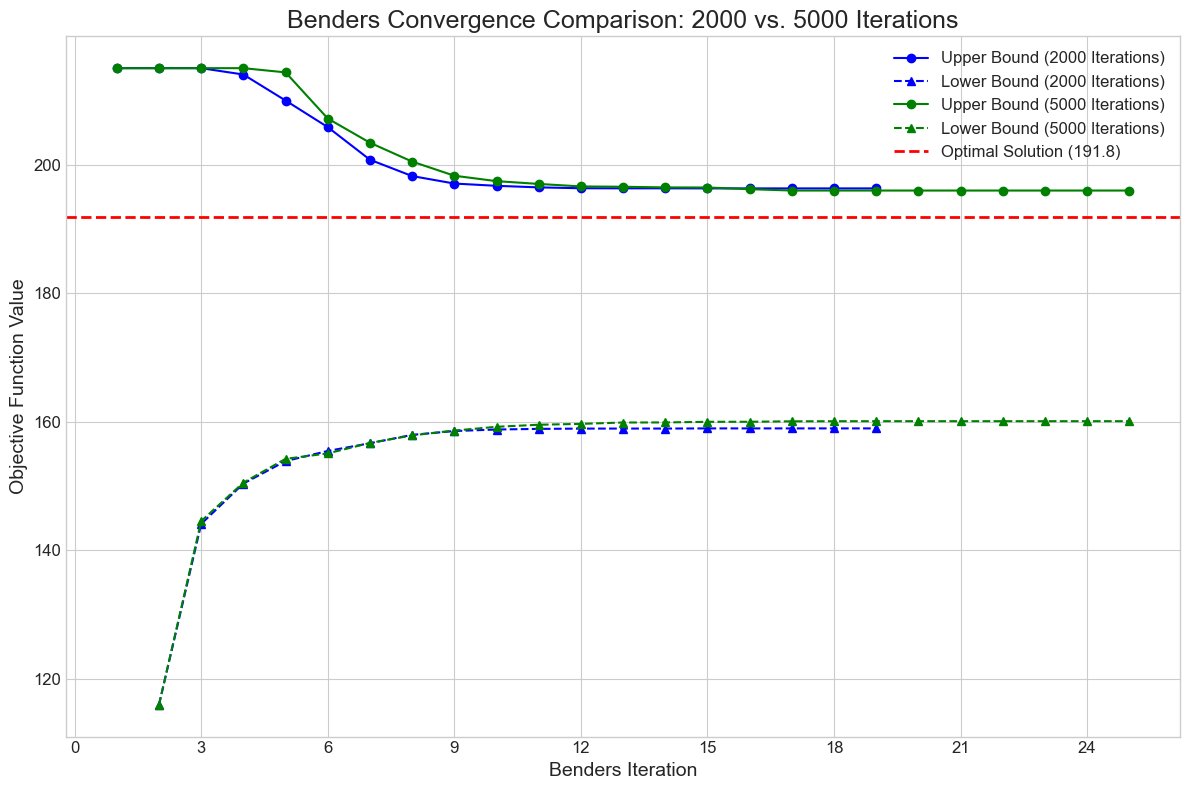

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
from matplotlib.ticker import MaxNLocator

def parse_bounds_list(bounds_string):
    """
    Custom function to parse a string representation of a list of numbers,
    correctly handling '-inf'.
    """
    # Handle non-string or empty inputs
    if not isinstance(bounds_string, str):
        return []

    # Strip brackets and split by comma
    cleaned_string = bounds_string.strip('[] ')
    if not cleaned_string:
        return []
        
    str_values = cleaned_string.split(',')
    
    # Convert each value to a float, handling the '-inf' case
    float_values = [float('-inf') if val.strip() == '-inf' else float(val) for val in str_values]
            
    return float_values

def process_group_data(df_group):
    """
    Takes a dataframe for a group and returns the processed average bounds and iteration counts.
    """
    if df_group.empty:
        print(f"Warning: No data found for one of the specified groups. It will be skipped in the plot.")
        return None, None, None

    df_copy = df_group.copy()
    # Use the robust custom function to parse the lower bounds
    df_copy.loc[:, 'lower_bounds'] = df_copy['lower_bounds'].apply(parse_bounds_list)
    # The upper bounds can still be parsed with ast.literal_eval as they are well-formed
    df_copy.loc[:, 'upper_bounds'] = df_copy['upper_bounds'].apply(ast.literal_eval)

    if df_copy['number_of_benders_iterations'].empty or df_copy['number_of_benders_iterations'].isnull().all():
        return None, None, None
        
    max_iterations = int(df_copy['number_of_benders_iterations'].max())
    iterations = np.arange(1, max_iterations + 1)

    # Pad the bounds lists to have the same length (max_iterations) for averaging.
    padded_lower_bounds = [
        l + [l[-1]] * (max_iterations - len(l)) if l else [np.nan] * max_iterations
        for l in df_copy['lower_bounds']
    ]
    padded_upper_bounds = [
        u + [u[-1]] * (max_iterations - len(u)) if u else [np.nan] * max_iterations
        for u in df_copy['upper_bounds']
    ]

    # Calculate the mean for each iteration
    avg_lower_bounds = np.nanmean(np.array(padded_lower_bounds), axis=0)
    avg_upper_bounds = np.nanmean(np.array(padded_upper_bounds), axis=0)
    
    return iterations, avg_lower_bounds, avg_upper_bounds

# --- Main part of the script ---
if __name__ == '__main__':
    # IMPORTANT: Make sure your CSV file is named this way, or change the name here.
    csv_filename = 'fujitsu_quboResults.csv'
    try:
        df = pd.read_csv(csv_filename)
    except FileNotFoundError:
        print(f"Error: The file '{csv_filename}' was not found.")
        print("Please save your data as 'new_results.csv' or update the 'csv_filename' variable in the script.")
        exit()

    # --- Data Filtering ---
    # 1. Filter for runs with 3 time periods
    df_3_periods = df[df['number_of_time_periods'] == 3].copy()
    # 2. Separate into groups based on 'number_of_runs'
    df_2000 = df_3_periods[df_3_periods['number_of_runs'] == 2000].copy()
    df_5000 = df_3_periods[df_3_periods['number_of_runs'] == 5000].copy()

    # --- Process Data for Both Groups ---
    iter_2000, lb_2000, ub_2000 = process_group_data(df_2000)
    iter_5000, lb_5000, ub_5000 = process_group_data(df_5000)
    
    # --- Plotting Setup ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 8))

    # --- Plot Data for 2000 Runs (Blue) ---
    if iter_2000 is not None:
        ax.plot(iter_2000, ub_2000, marker='o', linestyle='-', color='blue', label='Upper Bound (2000 Iterations)')
        ax.plot(iter_2000, lb_2000, marker='^', linestyle='--', color='blue', label='Lower Bound (2000 Iterations)')

    # --- Plot Data for 5000 Runs (Green) ---
    if iter_5000 is not None:
        ax.plot(iter_5000, ub_5000, marker='o', linestyle='-', color='green', label='Upper Bound (5000 Iterations)')
        ax.plot(iter_5000, lb_5000, marker='^', linestyle='--', color='green', label='Lower Bound (5000 Iterations)')
    
    # --- Plot Optimal Solution Line (Red) ---
    optimal_solution = 191.8
    ax.axhline(y=optimal_solution, color='red', linestyle='--', lw=2, label=f'Optimal Solution ({optimal_solution})')

    # --- Formatting and Labels ---
    ax.set_title('Benders Convergence Comparison: 2000 vs. 5000 Iterations', fontsize=18)
    ax.set_xlabel('Benders Iteration', fontsize=14)
    ax.set_ylabel('Objective Function Value', fontsize=14)
    
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
    
    ax.legend(fontsize=12)
    ax.grid(True)
    plt.tight_layout()

    # --- Save and Show the Plot ---
    filename = 'runs_convergence_comparison.png'
    plt.savefig(filename)
    print(f"Plot saved as {filename}")
    plt.show()

## Calculations fujitsu 3-time

In [3]:
import pandas as pd

def analyze_solver_performance(df_group, runs_value_str):

    print("--------------------------------------------------")
    print(f"Analysis for {runs_value_str} Runs Configuration")
    print("--------------------------------------------------")

    # IMPORTANT: Change this string if your success condition is different!
    termination_condition = "Known Optimal Solution Found for 3-Period Case"

    # Filter for runs that meet the specific termination condition
    optimal_runs_df = df_group[df_group['termination_reason'] == termination_condition].copy()

    # 1. Calculate how many times the optimal solution was found
    num_optimal_found = len(optimal_runs_df)
    print(f"Found the known optimal solution: {num_optimal_found} times.")

    # 2. & 3. Calculate average time and iterations for these successful runs
    if num_optimal_found > 0:
        # Calculate the average of the 'time_used' column
        avg_time_to_opt = optimal_runs_df['time_used'].mean()
        
        # Calculate the average of the 'number_of_benders_iterations' column
        avg_iterations_to_opt = optimal_runs_df['number_of_benders_iterations'].mean()

        print(f"Average time when finding optimal: {avg_time_to_opt:.2f} seconds.")
        print(f"Average Benders iterations when finding optimal: {avg_iterations_to_opt:.2f} iterations.")
    else:
        print("The known optimal solution was not found in any of these runs.")
    
    print("\n")

# --- Main part of the script ---
if __name__ == '__main__':
    # IMPORTANT: Make sure your CSV file is named this way, or change the name here.
    csv_filename = 'fujitsu_quboResults.csv'
    try:
        df = pd.read_csv(csv_filename)
    except FileNotFoundError:
        print(f"Error: The file '{csv_filename}' was not found.")
        print("Please save your data as 'new_results.csv' or update the 'csv_filename' variable in the script.")
        exit()

    # Filter for runs with 3 time periods
    df_3_periods = df[df['number_of_time_periods'] == 3].copy()

    # Separate into groups based on 'number_of_runs'
    df_2000 = df_3_periods[df_3_periods['number_of_runs'] == 2000].copy()
    df_5000 = df_3_periods[df_3_periods['number_of_runs'] == 5000].copy()

    # Run the analysis for each group
    analyze_solver_performance(df_2000, "2,000")
    analyze_solver_performance(df_5000, "5,000")

--------------------------------------------------
Analysis for 2,000 Runs Configuration
--------------------------------------------------
Found the known optimal solution: 40 times.
Average time when finding optimal: 12.57 seconds.
Average Benders iterations when finding optimal: 7.78 iterations.


--------------------------------------------------
Analysis for 5,000 Runs Configuration
--------------------------------------------------
Found the known optimal solution: 22 times.
Average time when finding optimal: 24.41 seconds.
Average Benders iterations when finding optimal: 7.32 iterations.




## 1000 and 1500 iter, fujitsu

In [7]:
import pandas as pd

def analyze_solver_performance(df_group, runs_value_str):
    """
    Analyzes and prints performance statistics for a given data group.

    Args:
        df_group (pd.DataFrame): The DataFrame for a specific configuration.
        runs_value_str (str): A string describing the configuration (e.g., "1,000").
    """
    print("--------------------------------------------------")
    print(f"Analysis for {runs_value_str} Iterations Configuration")
    print("--------------------------------------------------")

    # Define the specific termination condition for a successful run
    termination_condition = "Known Optimal Solution Found for 3-Period Case"

    # Filter for runs that meet the success condition
    optimal_runs_df = df_group[df_group['termination_reason'] == termination_condition].copy()

    # 1. Calculate how many times the optimal solution was found out of the total
    num_optimal_found = len(optimal_runs_df)
    total_runs = len(df_group)
    print(f"Found the known optimal solution: {num_optimal_found} out of {total_runs} times.")

    # 2. Calculate average time for these successful runs
    if num_optimal_found > 0:
        # Calculate the average of the 'time_used' column
        avg_time_to_opt = optimal_runs_df['time_used'].mean()
        
        print(f"Average time when finding optimal: {avg_time_to_opt:.2f} seconds.")
    else:
        print("The known optimal solution was not found in any of these runs.")
    
    print("\n")

# --- Main part of the script ---
if __name__ == '__main__':
    # Set the filename for the new CSV data
    csv_filename = 'fujitsu_large.csv'
    try:
        df = pd.read_csv(csv_filename)
    except FileNotFoundError:
        print(f"Error: The file '{csv_filename}' was not found.")
        print(f"Please make sure your data file is named '{csv_filename}' or update the variable in the script.")
        exit()

    # Filter for runs with exactly 3 time periods
    df_3_periods = df[df['number_of_time_periods'] == 3].copy()

    # Verify that there is data to analyze
    if df_3_periods.empty:
        print("No data found for 3-period runs in the specified file.")
        exit()

    # Separate the data into groups based on the 'number_of_runs' column
    # The user referred to these as 'iterations'.
    df_1000 = df_3_periods[df_3_periods['number_of_runs'] == 1000].copy()
    df_1500 = df_3_periods[df_3_periods['number_of_runs'] == 1500].copy()

    # Run the analysis for the 1000 iterations group
    if not df_1000.empty:
        analyze_solver_performance(df_1000, "1,000")
    else:
        print("--------------------------------------------------")
        print("No data found for the 1,000 iterations configuration.")
        print("--------------------------------------------------\n")

    # Run the analysis for the 1500 iterations group
    if not df_1500.empty:
        analyze_solver_performance(df_1500, "1,500")
    else:
        print("--------------------------------------------------")
        print("No data found for the 1,500 iterations configuration.")
        print("--------------------------------------------------\n")


--------------------------------------------------
Analysis for 1,000 Iterations Configuration
--------------------------------------------------
Found the known optimal solution: 68 out of 100 times.
Average time when finding optimal: 8.91 seconds.


--------------------------------------------------
Analysis for 1,500 Iterations Configuration
--------------------------------------------------
Found the known optimal solution: 71 out of 100 times.
Average time when finding optimal: 10.91 seconds.




## 5 and 6 time periods data

In [6]:
import pandas as pd
import os

# --- Configuration ---
DWAVE_FILE = "dwave_quboResults.csv"
FUJITSU_FILE = "fujitsu_quboResults.csv"

def analyze_solver_results(df, solver_name, category_col, category_values, time_period):
    """
    Analyzes and prints statistics for a given solver's results.

    Args:
        df (pd.DataFrame): The DataFrame containing the solver's results.
        solver_name (str): The name of the solver for printing.
        category_col (str): The column name to use for categorization (e.g., 'number_of_sweeps').
        category_values (list): A list of values in the category column to analyze.
        time_period (int): The number of time periods to filter for (e.g., 5 or 6).
    """
    print(f"--- Results for {solver_name} ({time_period}-Period Runs) ---")
    
    # Define the exact success message based on the solver and time period
    if "Simulated Annealing" in solver_name:
        # Specific termination message for the D-Wave solver
        success_string = f"Known optimal solution for {time_period}-period case"
    else:
        # Specific termination message for the Fujitsu solver
        success_string = f"Known Optimal Solution Found for {time_period}-Period Case"

    # Filter the DataFrame for the specified time period
    period_df = df[df['number_of_time_periods'] == time_period].copy()

    if period_df.empty:
        print(f"No data found for {time_period}-period runs.\n")
        return

    for value in category_values:
        print(f"\nAnalyzing with {category_col.replace('_', ' ')} = {value}:")
        
        # Filter for the specific category (e.g., sweeps = 256000)
        category_df = period_df[period_df[category_col] == value]
        total_runs = len(category_df)

        if total_runs == 0:
            print("  - No runs found for this configuration.")
            continue
            
        # --- NEW CALCULATION: Average of 'best_solution' for all runs in the category ---
        avg_best_solution = category_df['best_solution'].mean()
        print(f"  - Average Best Solution (all runs): {avg_best_solution:.2f}")

        # Filter for the runs that found the known optimal solution
        successful_runs_df = category_df[category_df['termination_reason'] == success_string]
        num_successful = len(successful_runs_df)

        print(f"  - Success Rate: Found the known optimal solution in {num_successful} out of {total_runs} runs.")

        # Calculate and print averages only if there were successful runs
        if num_successful > 0:
            # Calculate the mean of 'time_used' and 'number_of_benders_iterations'
            avg_time = successful_runs_df['time_used'].mean()
            avg_benders_iterations = successful_runs_df['number_of_benders_iterations'].mean()
            
            print(f"  - Performance (for successful runs):")
            print(f"    - Average Time: {avg_time:.2f} seconds")
            print(f"    - Average Benders Iterations: {avg_benders_iterations:.2f}")
    
    print("\n" + "="*60 + "\n")


def main():
    """
    Main function to load data and run the analysis for all scenarios.
    """
    # --- Load DataFrames ---
    try:
        df_dwave = pd.read_csv(DWAVE_FILE)
        df_fujitsu = pd.read_csv(FUJITSU_FILE)
    except FileNotFoundError as e:
        print(f"Error: {e}. Please ensure both '{DWAVE_FILE}' and '{FUJITSU_FILE}' are in the same directory as this script.")
        return

    # --- Analysis for 5-Period Runs ---
    print("="*20, "ANALYSIS FOR 5-PERIOD RUNS", "="*20, "\n")
    analyze_solver_results(
        df=df_dwave,
        solver_name="Simulated Annealing (D-Wave)",
        category_col='number_of_sweeps',
        category_values=[256000, 640000],
        time_period=5
    )
    analyze_solver_results(
        df=df_fujitsu,
        solver_name="Digital Annealing (Fujitsu)",
        category_col='number_of_runs',
        category_values=[2000, 5000],
        time_period=5
    )

    # --- Analysis for 6-Period Runs ---
    print("="*20, "ANALYSIS FOR 6-PERIOD RUNS", "="*20, "\n")
    analyze_solver_results(
        df=df_dwave,
        solver_name="Simulated Annealing (D-Wave)",
        category_col='number_of_sweeps',
        category_values=[256000, 640000],
        time_period=6
    )
    analyze_solver_results(
        df=df_fujitsu,
        solver_name="Digital Annealing (Fujitsu)",
        category_col='number_of_runs',
        category_values=[2000, 5000],
        time_period=6
    )


if __name__ == "__main__":
    main()


==================== ANALYSIS FOR 5-PERIOD RUNS ==================== 

--- Results for Simulated Annealing (D-Wave) (5-Period Runs) ---

Analyzing with number of sweeps = 256000:
  - Average Best Solution (all runs): 323.19
  - Success Rate: Found the known optimal solution in 2 out of 100 runs.
  - Performance (for successful runs):
    - Average Time: 11.31 seconds
    - Average Benders Iterations: 5.50

Analyzing with number of sweeps = 640000:
  - Average Best Solution (all runs): 322.18
  - Success Rate: Found the known optimal solution in 1 out of 100 runs.
  - Performance (for successful runs):
    - Average Time: 55.36 seconds
    - Average Benders Iterations: 8.00


--- Results for Digital Annealing (Fujitsu) (5-Period Runs) ---

Analyzing with number of runs = 2000:
  - Average Best Solution (all runs): 301.70
  - Success Rate: Found the known optimal solution in 19 out of 100 runs.
  - Performance (for successful runs):
    - Average Time: 23.37 seconds
    - Average Benders